# Лаба 4:: Критические параметры реактора с отражателем
$UO_2$ $C, x = 1.5\%$

Добавка: [1.39605024]


,keff,D1,D2,Sabs1,Sabs2,L^2,Rkr
0,1.1742,1.092698,0.817596,0.001038,0.013344,61.269895,45.10395


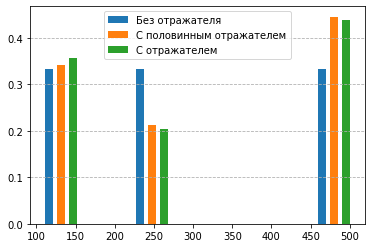

In [10]:
import numpy as np
import matplotlib.pyplot as pl 
import pandas as pd 
R = 465.0
R1 = R/4
R2 = R/2
Rtolsh = 3*np.sqrt(63.461645)

Rho = pd.DataFrame({'R':[R,R+0.5*Rtolsh,R+Rtolsh],'F1':[0.8229443E-04,0.8578851E-04,0.5532259E-01],'F2':[0.8229437E-04,0.6593232E-04,0.4502838E-01],'F3':[0.8229433E-04,0.4086498E-04,0.2580443E-01]})
Rho['F1/F'] = Rho['F1']/(Rho['F1']+Rho['F2']+Rho['F3'])
Rho['F2/F'] = Rho['F2']/(Rho['F1']+Rho['F2']+Rho['F3'])
Rho['F3/F'] = Rho['F3']/(Rho['F1']+Rho['F2']+Rho['F3'])
pl.bar([R,R1,R2],[Rho['F1/F'][0],Rho['F2/F'][0],Rho['F3/F'][0]],width = 10,label = 'Без отражателя')
pl.bar([R+15,R1+15,R2+15],[Rho['F1/F'][1],Rho['F2/F'][1],Rho['F3/F'][1]],width = 10,label = 'С половинным отражателем')
pl.bar([R+30,R1+30,R2+30],[Rho['F1/F'][2],Rho['F2/F'][2],Rho['F3/F'][2]],width = 10,label = 'С отражателем')
pl.legend()
pl.grid(linestyle='--',axis='y')
Rho2 = pd.DataFrame({'keff':[0]})
Rho2['keff'] = 1.1742
Rho2['D1'] =  1.092698
Rho2['D2'] = 0.8175959     
Rho2['Sabs1'] = 0.1037583E-02
Rho2['Sabs2'] = 0.1334417E-01
Rho2['L^2'] = 0*Rho2['D1']+Rho2['D2']/(0*Rho2['Sabs1']+Rho2['Sabs2'])
Rho2['Rkr'] = 2.405/(np.sqrt(Rho2['keff']-1))*np.sqrt(Rho2['L^2'])
pl.savefig('lalalaa.png',dpi = 500)
print('Добавка:',R/10-Rho2['Rkr'].values)

Rho2


In [22]:
Rho
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

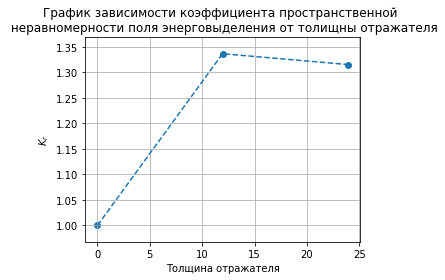

In [24]:
Kr = [1,0.000086*3/(0.000086+0.000066+0.000041),0.055323*3/(0.055323+0.045028+0.025804)]
pl.title('График зависимости коэффициента пространственной \n неравномерности поля энерговыделения от толищны отражателя')
pl.grid()
pl.xlabel('Толщина отражателя')
pl.ylabel('$K_r$')
pl.scatter([0,Rtolsh/2,Rtolsh],Kr)
pl.plot([0,Rtolsh/2,Rtolsh],Kr, linestyle='--')
pl.savefig('Krr.png',dpi = 500)